## Homework

The goal of this homework is to create a simple training pipeline, use mlflow to track experiments and register best model.

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), the **Yellow** taxi data for March, 2023. 


## Question 1. Select the Tool

You can use the same tool you used when completing the module,
or choose a different one for your homework.

What's the name of the orchestrator you chose? 

Table with the best orchestrators:

| Criterion                     | **Airflow**            | **Prefect** | **Dagster**         |
| ----------------------------- | ---------------------- | ----------- | ------------------- |
| Adoption in large companies   | ✅ Very high            | ⚠️ Medium   | ⚠️ Medium-low       |
| Learning curve                | ⚠️ Medium-high         | ✅ Low       | ⚠️ Medium           |
| Suited for ML pipelines       | ⚠️ Requires adaptation | ✅ Natural   | ✅ Very strong       |
| Community and documentation   | ✅ Huge                 | ✅ Very good | ✅ Very good         |
| Maintenance and scalability   | ✅ Production-proven    | ✅ Scalable  | ✅ Highly structured |



Finally, I chose Airflow.

## Installing Apache Airflow using Docker Compose

**Prerequisites**

Make sure you have installed:
- Docker
- Docker Compose (comes with Docker Desktop)
- Git
- curl or wget

**Steps**

1. Create a folder for your project:

mkdir HW3_airflow && cd HW3_airflow

2. Download the official docker-compose.yaml:

curl -LfO 'https://airflow.apache.org/docs/apache-airflow/2.9.1/docker-compose.yaml'

3. Create required folders:

mkdir -p ./dags ./logs ./plugins ./config

4. Set the Airflow user ID as an environment variable:

echo -e "AIRFLOW_UID=$(id -u)" > .env

5. Initialize Airflow

docker compose up airflow-init

6. Start Airflow

docker compose up

7. Open your browser and navigate to:

📍 http://localhost:8080

Default credentials:
- Username: airflow
- Password: airflow



## Question 2. Version

What's the version of the orchestrator? 

In [ ]:
#In terminal with bash:

docker exec -it hw3_airflow-airflow-scheduler-1 airflow version

2.9.1

## Question 3. Creating a pipeline

Let's read the March 2023 Yellow taxi trips data.

How many records did we load? 

- 3,003,766
- 3,203,766
- **3,403,766**
- 3,603,766

(Include a print statement in your code)

**Steps**

1. Create the DAG file

Create a file named something like: dags/load_yellow_taxi_data.py

Here is a minimal DAG that downloads the dataset, reads it with pandas, prints the number of records (which you can see in the logs), and finishes.

2. Check the results

Open Airflow UI at http://localhost:8080

Trigger the DAG called yellow_taxi_load_count.

Click on the task count_taxi_records and then check the Log tab.

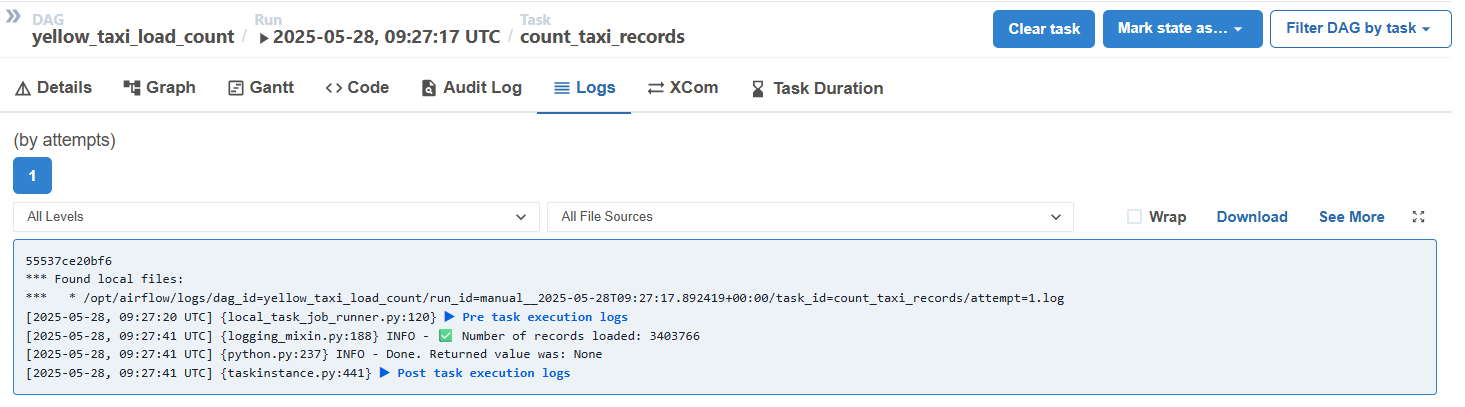


## Question 4. Data preparation

Let's continue with pipeline creation.

We will use the same logic for preparing the data we used previously. 

This is what we used (adjusted for yellow dataset):

```python
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df
```

Let's apply to the data we loaded in question 3. 

What's the size of the result? 

- 2,903,766
- 3,103,766
- **3,316,216** 
- 3,503,766

**Steps**

1. Update the DAG file or create a new dag (load_yellow_taxi_data_Q4.py) to include data preparation. Place the file in your dags/ folder.

2. Run this updated DAG in Airflow UI. Trigger the DAG yellow_taxi_prepare_data.

Check the logs of task prepare_taxi_data.

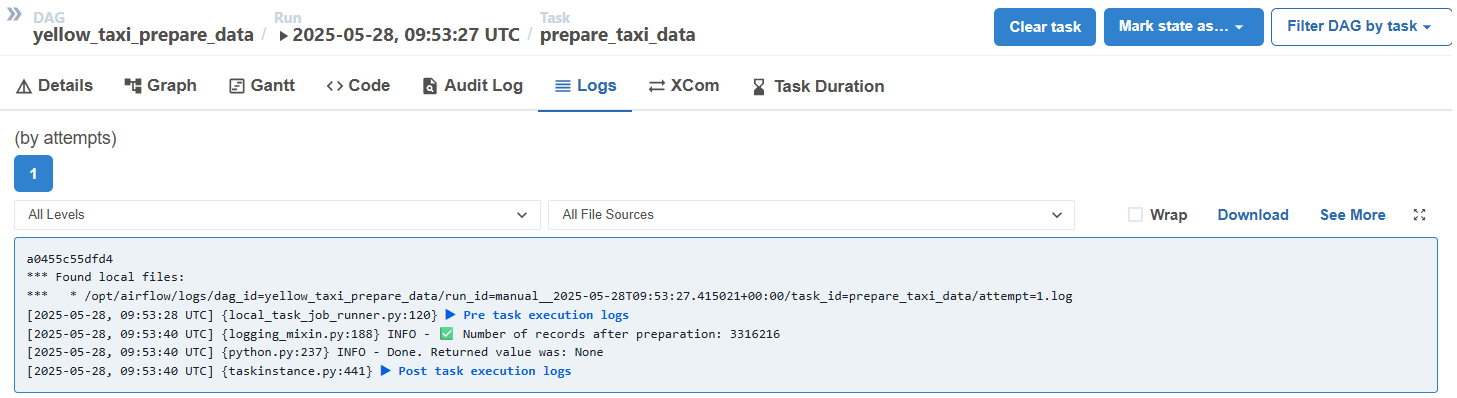

## Question 5. Train a model

We will now train a linear regression model using the same code as in homework 1.

* Fit a dict vectorizer.
* Train a linear regression with default parameters.
* Use pick up and drop off locations separately, don't create a combination feature.

Let's now use it in the pipeline. We will need to create another transformation block, and return both the dict vectorizer and the model.

What's the intercept of the model? 

Hint: print the `intercept_` field in the code block

- 21.77
- **24.77**
- 27.77
- 31.77

**Steps**

1. Update the DAG file or create a new dag (train_model_Q5.py) to include data preparation and model training. Place the file in your dags/ folder.

2. Run this updated DAG in Airflow UI. Trigger the DAG .

Check the logs of task prepare_taxi_data.

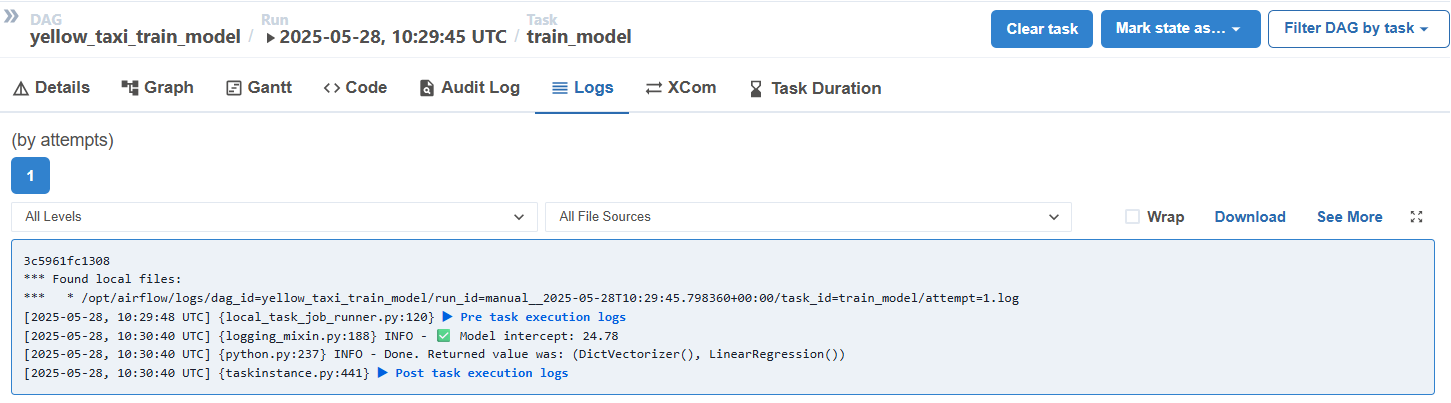

## Question 6. Register the model 

The model is trained, so let's save it with MLFlow.

Find the logged model, and find MLModel file. What's the size of the model? (`model_size_bytes` field):

* 14,534
* 9,534
* **4,534**
* 1,534

Looking for: HW3_airflow\mlruns\...\artifacts\model\MLmodel

model_size_bytes: 4500